<a href="https://colab.research.google.com/github/seiyu32/CV/blob/master/FAANG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#Description: This is a python program for finance
#             This program will show you how to compute portforlio simple returns,
#              get daily returns and volatility etc.

In [0]:
#Import the libraries
from datetime import datetime
import numpy as np
import pandas as pd
import pandas_datareader as web
import matplotlib.pyplot as plt 
plt.style.use('fivethirtyeight')

In [0]:
#Get the stock symbos for the portforlio
#FAANG
stockSymbols = ["FB", "AMZN", "AAPL", "NFLX", "GOOG"]

In [0]:
#Get the stock starting date
stockStartDate = '2013-01-01'

In [7]:
#Get todays date and format it in the form YYYY-mm-dd
today = datetime.today().strftime('%Y-%m-%d')

print(today)

2020-02-07


In [8]:
#Get the number of assets in the portfolio
numAssets = len(stockSymbols)

print('You have '+str(numAssets)+' assets in your portfolio.')

You have 5 assets in your portfolio.


In [0]:
#Create a function to get the stock prices in the portfolio
def getMyPortfolio(stocks= stockSymbols, start=stockStartDate, end=today, col='Adj Close'):
  data = web.DataReader(stocks, data_source='yahoo', start=start, end=end)[col]
  return data

In [10]:
#Get the stock portfolio Adj. Close price
my_stocks = getMyPortfolio(stockSymbols)
my_stocks

Symbols,FB,AMZN,AAPL,NFLX,GOOG
Date,,,,,
2013-01-02,28.000000,257.309998,68.850548,13.144286,360.274597
2013-01-03,27.770000,258.480011,67.981491,13.798572,360.483826
2013-01-04,28.760000,259.149994,66.087891,13.711429,367.607117
2013-01-07,29.420000,268.459991,65.699158,14.171429,366.003143
2013-01-08,29.059999,266.380005,65.875954,13.880000,365.280823
...,...,...,...,...,...
2020-02-03,204.190002,2004.199951,308.660004,358.000000,1485.939941
2020-02-04,209.830002,2049.669922,318.850006,369.010010,1447.069946
2020-02-05,210.110001,2039.869995,321.450012,369.670013,1448.229980


In [0]:
#Create a function to visualize the portfolio
def showGraph(stocks= stockSymbols, start=stockStartDate, end=today, col='Adj Close'):

  #Creat a title for the portfolio
  title = 'Portfolio '+col+' Price History'

  #Get the stocks
  my_stocks = getMyPortfolio(stocks = stocks, start=start, end=end, col=col)

  #Give the figure a size
  plt.figure(figsize=(12.2, 4.5))

  #Loop through each stock and plot the price
  for c in my_stocks.columns.values:
    plt.plot( my_stocks[c], label=c)

  plt.title(title)
  plt.xlabel('Date', fontsize = 18)
  plt.ylabel(col+' Price USD ($)', fontsize=18)
  plt.legend(my_stocks.columns.values, loc='upper left')
  plt.show()

/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


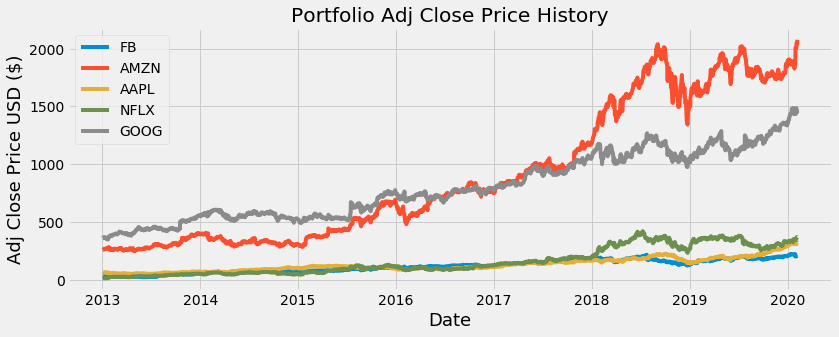

In [12]:
#Show the adjusted close price for FAANG
showGraph(stockSymbols)

In [13]:
#Calculate the simple returns
daily_simple_returns = my_stocks.pct_change(1)

#show the daily simple returns
daily_simple_returns


Symbols,FB,AMZN,AAPL,NFLX,GOOG
Date,,,,,
2013-01-02,NaN,NaN,NaN,NaN,NaN
2013-01-03,-0.008214,0.004547,-0.012622,0.049777,0.000581
2013-01-04,0.035650,0.002592,-0.027855,-0.006315,0.019760
2013-01-07,0.022949,0.035925,-0.005882,0.033549,-0.004363
2013-01-08,-0.012237,-0.007748,0.002691,-0.020565,-0.001974
...,...,...,...,...,...
2020-02-03,0.011292,-0.002250,-0.002746,0.037411,0.036054
2020-02-04,0.027621,0.022687,0.033014,0.030754,-0.026159
2020-02-05,0.001334,-0.004781,0.008154,0.001789,0.000802


In [14]:
(27.77 / 28) - 1

-0.00821428571428573

In [15]:
#show the stock correlation
daily_simple_returns.corr()

Symbols,FB,AMZN,AAPL,NFLX,GOOG
Symbols,,,,,
FB,1.000000,0.471343,0.345859,0.315921,0.491921
AMZN,0.471343,1.000000,0.368084,0.405506,0.578259
AAPL,0.345859,0.368084,1.000000,0.200834,0.425999
NFLX,0.315921,0.405506,0.200834,1.000000,0.391883
GOOG,0.491921,0.578259,0.425999,0.391883,1.000000


In [16]:
# show the covariance matrix for simple returns
daily_simple_returns.cov()

Symbols,FB,AMZN,AAPL,NFLX,GOOG
Symbols,,,,,
FB,0.000418,0.000178,0.000111,0.000186,0.000148
AMZN,0.000178,0.000343,0.000107,0.000216,0.000157
AAPL,0.000111,0.000107,0.000248,0.000091,0.000098
NFLX,0.000186,0.000216,0.000091,0.000831,0.000166
GOOG,0.000148,0.000157,0.000098,0.000166,0.000216


In [17]:
#show the variance
daily_simple_returns.var()

Symbols
FB      0.000418
AMZN    0.000343
AAPL    0.000248
NFLX    0.000831
GOOG    0.000216
dtype: float64

In [18]:
#print the standard deviation for daily simple returns
print("The Stock Volatility:")
daily_simple_returns.std()

The Stock Volatility:


Symbols
FB      0.020449
AMZN    0.018507
AAPL    0.015738
NFLX    0.028830
GOOG    0.014686
dtype: float64

Text(0.5, 0, 'Date')

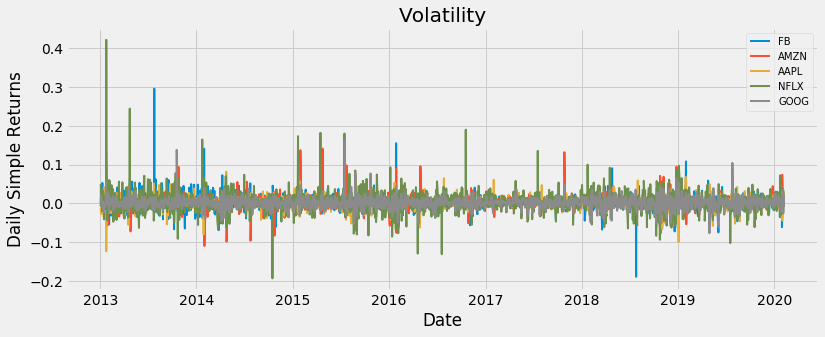

In [19]:
#visualize the stocks daily simple returns
plt.figure(figsize=(12,4.5))


#loop through each stock and plot the simple returns
for c in daily_simple_returns.columns.values:
  plt.plot(daily_simple_returns[c], lw=2, label=c)


#create a legend
plt.legend(loc='upper right', fontsize=10)
plt.title('Volatility')
plt.ylabel('Daily Simple Returns')
plt.xlabel('Date')

In [20]:
# show the mean of the daily simple return
dailyMeanSimpleReturns = daily_simple_returns.mean()

#Print
print("The daily mean simple return: ")
print(dailyMeanSimpleReturns)

The daily mean simple return: 
Symbols
FB      0.001338
AMZN    0.001340
AAPL    0.000989
NFLX    0.002266
GOOG    0.000897
dtype: float64


In [21]:
#calculate the expected portfolio daily return
randomWeights = np.array([0.4, 0.1, 0.3, 0.1, 0.1]) #40% FB, 10% AMZN, 30% AAPL, 10% NFLX, 10% GOOG

portfolioSimpleReturn = np. sum(daily_simple_returns * randomWeights)

#print the expected portfolio return 
print("The daily expected portfolio return: "+ str(portfolioSimpleReturn))

The daily expected portfolio return: Symbols
FB      0.956054
AMZN    0.239386
AAPL    0.530182
NFLX    0.404989
GOOG    0.160251
dtype: float64


In [22]:
#get the yearly simple return
print("Expected annualised portfolio simple return: " + str(portfolioSimpleReturn * 253))

Expected annualised portfolio simple return: Symbols
FB      241.881683
AMZN     60.564680
AAPL    134.136022
NFLX    102.462209
GOOG     40.543443
dtype: float64


In [23]:
#calculate the growth of the investment
dailyCumulSimplReturn = (daily_simple_returns+1).cumprod()


#show the cumulative simple returns
dailyCumulSimplReturn

Symbols,FB,AMZN,AAPL,NFLX,GOOG
Date,,,,,
2013-01-02,NaN,NaN,NaN,NaN,NaN
2013-01-03,0.991786,1.004547,0.987378,1.049777,1.000581
2013-01-04,1.027143,1.007151,0.959875,1.043147,1.020353
2013-01-07,1.050714,1.043333,0.954229,1.078144,1.015900
2013-01-08,1.037857,1.035249,0.956796,1.055972,1.013896
...,...,...,...,...,...
2020-02-03,7.292500,7.789048,4.483044,27.236169,4.124465
2020-02-04,7.493929,7.965761,4.631045,28.073796,4.016575
2020-02-05,7.503929,7.927675,4.668808,28.124008,4.019795


In [24]:
#(period_1 + 1 )* (period_2 +1)* ..* (period_n+1)
(daily_simple_returns["GOOG"][1] +1) * (daily_simple_returns["GOOG"][2] + 1)

1.0203525854692204

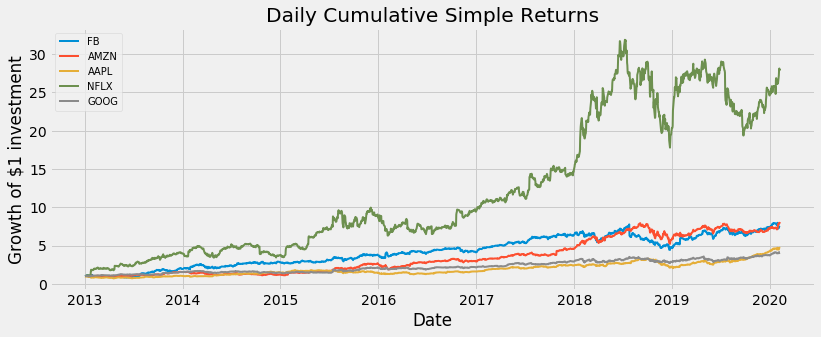

In [25]:
#Visualize the daily cumulative simple return

plt.figure(figsize=(12.2, 4.5))
for c in dailyCumulSimplReturn.columns.values:
  plt.plot(dailyCumulSimplReturn.index, dailyCumulSimplReturn[c], lw=2, label=c)
  
plt.legend(loc='upper left', fontsize=10)
plt.xlabel('Date')
plt.ylabel('Growth of $1 investment')
plt.title('Daily Cumulative Simple Returns')
plt.show()